# Record time taken for write, update and read operation

## Checks if update operation is successful (compare with the new image used for update)

In [1]:
import time
import controller
from PIL import Image
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt

test_files_list = [str(i*100) + "kb_image.jpg" for i in range(1, 7)]
new_files_list = [str(i*100) + "kb_new_image.jpg" for i in range(1, 7)]
updated_files_list = [str(i*100) + "kb_updated_image.jpg" for i in range(1, 7)]
time_taken_write = []
time_taken_update = []
time_taken_read = []
updated_file = "updated.jpg"
file_path= "test_files/"

R = controller.RAID6()

for file_name, new_file_name, updated_file_name in zip(test_files_list, new_files_list, updated_files_list):
    # Writing file to disk
    start = time.time()
    if R.write_data_from_file(file_path + file_name, file_name.split('.')[0]):
        time_taken = time.time() - start
        time_taken_write.append(time_taken)
        print("\nWrite operation is successful! \nTime taken for writing {} is {}".format(file_name, time_taken))
    else:
        print("\nWriting {} to disk has failed...".format(file_name))
    
    # Updating file to disk
    start = time.time()
    if R.update_data_from_file(file_path + new_file_name, file_name.split('.')[0]):
        time_taken = time.time() - start
        time_taken_update.append(time_taken)
        print("\nUpdate is done! \nTime taken for updating {} is {}".format(file_name, time_taken))
    else:
        print("\nUpdating {} to disk has failed...".format(file_name))
        
    # Read file from disk, using back the same data name but output to another file
    start = time.time()
    if R.print_data_to_file(file_path + updated_file_name, file_name.split('.')[0]):
        time_taken = time.time() - start
        time_taken_read.append(time_taken)
        print("\nRead operation (after updating) is successful! \nTime taken for reading {}'s data from disk is {}".format(file_name, time_taken))
    else:
        print("\nReading {}'s data from disk has failed...".format(file_name))
        
    # Check if updating works
    updated_im = Image.open(file_path + updated_file_name)
    new_im = Image.open(file_path + new_file_name)
    
    ssim = measure.compare_ssim(np.array(new_im), np.array(updated_im), multichannel=True)
    if ssim == 1.0:
        print("\nUpdating image is successful!")
        fig = plt.figure()
        ax1 = fig.add_subplot(1,2,1)
        ax1.imshow(np.asarray(updated_im))
        ax1.axis('off')
        ax1.title.set_text("Updated image")
        ax2 = fig.add_subplot(1,2,2)
        ax2.imshow(np.asarray(new_im))
        ax2.axis('off')
        ax2.title.set_text("Image used for updating")
        plt.show()
    else:
        print("\nUpdating image has failed... image recovered is not the same as image sent for updating")
    
    updated_im.close()
    new_im.close()



Write operation is successful! 
Time taken for writing 100kb_image.jpg is 2.2337207794189453
writing_to [{'index': 0, 'disk': 0, 'offset': 0, 'length': 102656}, {'index': 133, 'disk': 4, 'offset': 0, 'length': 2493}]
offset 0

Update is done! 
Time taken for updating 100kb_image.jpg is 3.0007615089416504
file test_files/100kb_updated_image.jpg starting index 0 length 102656
file test_files/100kb_updated_image.jpg starting index 133 length 2493

Read operation (after updating) is successful! 
Time taken for reading 100kb_image.jpg's data from disk is 0.7909963130950928

Updating image is successful!


<Figure size 640x480 with 2 Axes>

KeyboardInterrupt: 

# Plot time taken for Write, Update and Read operations for different file sizes

In [ ]:
import matplotlib.pyplot as plt

print(time_taken_write)

plt.xlabel('File Size in KB')
plt.ylabel('Time taken')
plt.title('Write Operation')
plt.plot([i*100 for i in range(1,7)], time_taken_write, 'r^--')
plt.show()

print(time_taken_update)

plt.xlabel('File Size in KB')
plt.ylabel('Time taken')
plt.title('Update Operation')
plt.plot([i*100 for i in range(1,7)], time_taken_update, 'bo--')
plt.show()

print(time_taken_read)

plt.xlabel('File Size in KB')
plt.ylabel('Time taken')
plt.title('Read Operation')
plt.plot([i*100 for i in range(1,7)], time_taken_read, 'gs--')
plt.show()




# Testing deleting 1 & 2 disks to simulate disk corruption and recording time taken to recover the missing disks


Write operation is successful!
file test_files/100kb_recovered_image.jpg starting index 0 length 102539
[!] Error disk: [0] ; Attempting recovery ...
[✓] Error recovered !


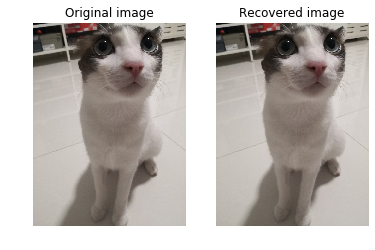


Read operation (after deleting disk) is successful!
Time taken for recovering 1 missing disk and reading 100kb_image.jpg's data from disk is 1.1296930313110352


KeyboardInterrupt: 

In [2]:
import shutil
import random
import time
import controller 
from PIL import Image
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt

test_files_list = [str(i*100) + "kb_image.jpg" for i in range(1, 7)]
new_files_list = [str(i*100) + "kb_new_image.jpg" for i in range(1, 7)]
updated_files_list = [str(i*100) + "kb_updated_image.jpg" for i in range(1, 7)]
time_taken_write = []
time_taken_update = []
time_taken_read = []
updated_file = "updated.jpg"
file_path= "test_files/"
R = controller.RAID6()

recovered_files_list = [str(i*100) + "kb_recovered_image.jpg" for i in range(1, 7)]
disk_list = list(range(8))
time_taken_deleted_1 = []


# Delete 1 disk
for test_file, recovered_file in zip(test_files_list, recovered_files_list):
    if R.write_data_from_file(file_path + test_file, test_file.split('.')[0]):
        print("\nWrite operation is successful!")
    else:
        print("\nWriting {} to disk has failed...".format(test_file))
        
    random_selected_disks = random.sample(disk_list, 1)
    shutil.rmtree('disks/disk_' + str(random_selected_disks[0]))

    
    start = time.time()
    if R.print_data_to_file(file_path + recovered_file, test_file.split('.')[0]):
        time_taken = time.time() - start
        time_taken_deleted_1.append(time_taken)
        
        original_im = Image.open(file_path + test_file)
        recovered_im = Image.open(file_path + recovered_file)
        
        ssim = measure.compare_ssim(np.array(original_im), np.array(recovered_im), multichannel=True)
        fig = plt.figure()
        ax1 = fig.add_subplot(1,2,1)
        ax1.imshow(np.asarray(original_im))
        ax1.axis('off')
        ax1.title.set_text("Original image")
        ax2 = fig.add_subplot(1,2,2)
        ax2.imshow(np.asarray(recovered_im))
        ax2.axis('off')
        ax2.title.set_text("Recovered image")
        plt.show()
        
        if ssim == 1.0:
            print("\nRead operation (after deleting disk) is successful!" + 
                  "\nTime taken for recovering 1 missing disk and reading {}'s data from disk is {}".format(test_file, time_taken))
        else:
            print("File recovered but is different file")
            
        original_im.close()
        recovered_im.close()
        
    else:
        print("\nReading {} from disk has failed...".format(test_file))



Write operation is successful!
100kb_recovered_image.jpg 100kb_image.jpg
file test_files/100kb_recovered_image.jpg starting index 0 length 102539
[!] Error disk: [3, 6] ; Attempting recovery ...
[✓] Error recovered !


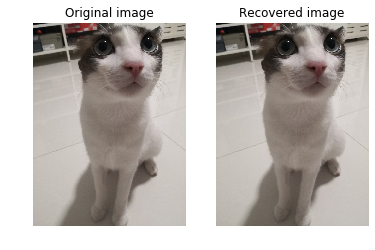


Read operation (after deleting disks) is successful!
Time taken for recovering 2 missing disks and reading 100kb_image.jpg's data from disk is 1.3840675354003906


KeyboardInterrupt: 

In [3]:
import shutil
import random
import time
import controller 
from PIL import Image
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt

test_files_list = [str(i*100) + "kb_image.jpg" for i in range(1, 7)]
new_files_list = [str(i*100) + "kb_new_image.jpg" for i in range(1, 7)]
updated_files_list = [str(i*100) + "kb_updated_image.jpg" for i in range(1, 7)]
time_taken_write = []
time_taken_update = []
time_taken_read = []
updated_file = "updated.jpg"
file_path= "test_files/"
R = controller.RAID6()

recovered_files_list = [str(i*100) + "kb_recovered_image.jpg" for i in range(1, 7)]
disk_list = list(range(8))
time_taken_deleted_2 = []

# Delete 2 disks      
for test_file, recovered_file in zip(test_files_list, recovered_files_list):
    if R.write_data_from_file(file_path + test_file, test_file.split('.')[0]):
        print("\nWrite operation is successful!")
    else:
        print("\nWriting {} to disk has failed...".format(test_file))
        
    random_selected_disks = random.sample(disk_list, 2)
    shutil.rmtree('disks/disk_' + str(random_selected_disks[0]))
    shutil.rmtree('disks/disk_' + str(random_selected_disks[1]))
    
    start = time.time()
    print(recovered_file, test_file)
    if R.print_data_to_file(file_path + recovered_file, test_file.split('.')[0]):
        time_taken = time.time() - start
        time_taken_deleted_2.append(time_taken)
        
        original_im = Image.open(file_path + test_file)
        recovered_im = Image.open(file_path + recovered_file)
        
        ssim = measure.compare_ssim(np.array(original_im), np.array(recovered_im), multichannel=True)
        fig = plt.figure()
        ax1 = fig.add_subplot(1,2,1)
        ax1.imshow(np.asarray(original_im))
        ax1.axis('off')
        ax1.title.set_text("Original image")
        ax2 = fig.add_subplot(1,2,2)
        ax2.imshow(np.asarray(recovered_im))
        ax2.axis('off')
        ax2.title.set_text("Recovered image")
        plt.show()
        
        if ssim == 1.0:
            print("\nRead operation (after deleting disks) is successful!" + 
                  "\nTime taken for recovering 2 missing disks and reading {}'s data from disk is {}".format(test_file, time_taken))
        else:
            print("File recovered but is different file")
            
        original_im.close()
        recovered_im.close()
        
    else:
        print("\nReading {} from disk has failed...".format(test_file))


In [ ]:
time_taken_deleted_2

# Plot time taken for recovering 1 & 2 disks for different file sizes

In [ ]:
print(time_taken_deleted_1)

plt.xlabel('File Size in KB')
plt.ylabel('Time taken')
plt.title('Recover 1 disk')
plt.plot([i*100 for i in range(1,7)], time_taken_deleted_1, 'r^--')
plt.show()

print(time_taken_deleted_2)

plt.xlabel('File Size in KB')
plt.ylabel('Time taken')
plt.title('Recover 2 disks')
plt.plot([i*100 for i in range(1,7)], time_taken_deleted_2, 'bo--')
plt.show()

# Testing different number of disks and different chunk sizes for write & read operation of a 600kb file

In [4]:
import shutil
import random
import time
import controller 
from PIL import Image
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt

test_files_list = [str(i*100) + "kb_image.jpg" for i in range(1, 7)]
new_files_list = [str(i*100) + "kb_new_image.jpg" for i in range(1, 7)]
updated_files_list = [str(i*100) + "kb_updated_image.jpg" for i in range(1, 7)]
time_taken_write = []
time_taken_update = []
time_taken_read = []
updated_file = "updated.jpg"
file_path= "test_files/"

disk_range = [2**i for i in range(3, 6)] # disk = 8/16/32/64/128/256 - MAX size for gf{2^8}
chunk_size_range = [2**i for i in range(7, 13)] # chunk size = 128/256/512/1024/2048/4096

# num_disk_files_list = [n + "_600kb_image.jpg" for n in disk_range]
# chunk_size_files_list = [n + "_600kb_image.jpg" for n in chunk_size_range]
time_taken_read_num_disk = []
time_taken_read_chunk_size = []
time_taken_write_num_disk = []
time_taken_write_chunk_size = []


fixed_file = "100kb_image.jpg"

for num_disk in disk_range:
    print("Number of Disks", num_disk)
    R = controller.RAID6(number_of_disk=num_disk)
    start = time.time()
    if R.write_data_from_file(file_path + fixed_file, fixed_file.split('.')[0]):
        print("\nWrite operation is successful!")
        time_taken = time.time() - start
        time_taken_write_num_disk.append(time_taken)
    else:
        print("\nWriting {} to disk has failed...".format(test_file))
        
    start = time.time()
    if R.print_data_to_file(file_path + str(num_disk) + "_disk.jpg", fixed_file.split('.')[0]):
        time_taken = time.time() - start
        time_taken_read_num_disk.append(time_taken)
        print("\nRead operation (after updating) is successful! \nTime taken for reading {}'s data from disk is {}".format(fixed_file, time_taken))
    else:
        print("\nReading {}'s data from disk has failed...".format(fixed_file))
        

for chunk_size in chunk_size_range:
    R = controller.RAID6(chunk_size=chunk_size)
    start = time.time()
    if R.write_data_from_file(file_path + fixed_file, fixed_file.split('.')[0]):
        print("\nWrite operation is successful!")
        time_taken = time.time() - start
        time_taken_write_chunk_size.append(time_taken)
    else:
        print("\nWriting {} to disk has failed...".format(test_file))
        
    start = time.time()
    if R.print_data_to_file(file_path + str(chunk_size) + "_chunksize.jpg", fixed_file.split('.')[0]):
        time_taken = time.time() - start
        time_taken_read_chunk_size.append(time_taken)
        print("\nRead operation (after updating) is successful! \nTime taken for reading {}'s data from disk is {}".format(fixed_file, time_taken))
    else:
        print("\nReading {}'s data from disk has failed...".format(file_name))
     
        


Number of Disks 8

Write operation is successful!
file test_files/8_disk.jpg starting index 0 length 102539

Read operation (after updating) is successful! 
Time taken for reading 100kb_image.jpg's data from disk is 0.7472894191741943
Number of Disks 16

Write operation is successful!
file test_files/16_disk.jpg starting index 0 length 102539

Read operation (after updating) is successful! 
Time taken for reading 100kb_image.jpg's data from disk is 0.44327783584594727
Number of Disks 32

Write operation is successful!
file test_files/32_disk.jpg starting index 0 length 102539

Read operation (after updating) is successful! 
Time taken for reading 100kb_image.jpg's data from disk is 0.2898867130279541


'\nfor chunk_size in chunk_size_range:\n    R = controller.RAID6(chunk_size=chunk_size)\n    start = time.time()\n    if R.write_data_from_file(file_path + fixed_file, fixed_file.split(\'.\')[0]):\n        print("\nWrite operation is successful!")\n        time_taken = time.time() - start\n        time_taken_write_chunk_size.append(time_taken)\n    else:\n        print("\nWriting {} to disk has failed...".format(test_file))\n        \n    start = time.time()\n    if R.print_data_to_file(file_path + str(chunk_size) + "_chunksize.jpg", fixed_file.split(\'.\')[0]):\n        time_taken = time.time() - start\n        time_taken_read_chunk_size.append(time_taken)\n        print("\nRead operation (after updating) is successful! \nTime taken for reading {}\'s data from disk is {}".format(fixed_file, time_taken))\n    else:\n        print("\nReading {}\'s data from disk has failed...".format(file_name))\n'

# Plot time taken for different number of disks and different chunk size for write & read of a 600kb file

In [ ]:
print(time_taken_read_num_disk)

plt.xlabel('Number of Disks')
plt.ylabel('Time taken')
plt.title('Read time for different number of disks')
plt.plot([2**i for i in range(3,6)], time_taken_read_num_disk, 'r^--')
plt.show()

print(time_taken_read_chunk_size)

plt.xlabel('Chunk Size in Bytes')
plt.ylabel('Time taken')
plt.title('Read time for different chunk size')
#plt.plot(time_taken_read_chunk_size)
plt.plot([2**i for i in range(7, 13)], time_taken_read_chunk_size, 'bo--')
plt.show()

print(time_taken_write_num_disk)

plt.xlabel('Number of Disks')
plt.ylabel('Time taken')
plt.title('Write time for different number of disks')
#plt.plot(time_taken_write_num_disk)
plt.plot([2**i for i in range(3,6)], time_taken_write_num_disk, 'r^--')
plt.show()

print(time_taken_write_chunk_size)

plt.xlabel('Chunk Size in Bytes')
plt.ylabel('Time taken')
plt.title('Write time for different chunk size')
#plt.plot(time_taken_write_chunk_size)
plt.plot([2**i for i in range(7, 13)], time_taken_write_chunk_size, 'bo--')
plt.show()